## Đạo hàm

Một cửa hàng mỗi ngày bán initial_quantity = 2000 lít xăng, giá mỗi lít là initial_price = 22 kvnd cửa hàng dự tính tăng giá xăng dầu thêm x vnd trên mỗi lít bán ra, cửa hàng đó bị mất đi decrease_per_x = 80 lít trên mỗi ngày vì số lượng khách giảm đi. Vậy tăng giá lên x kvnd bao nhiêu là tối ưu lợi nhuận nhất với đạo hàm nhé.

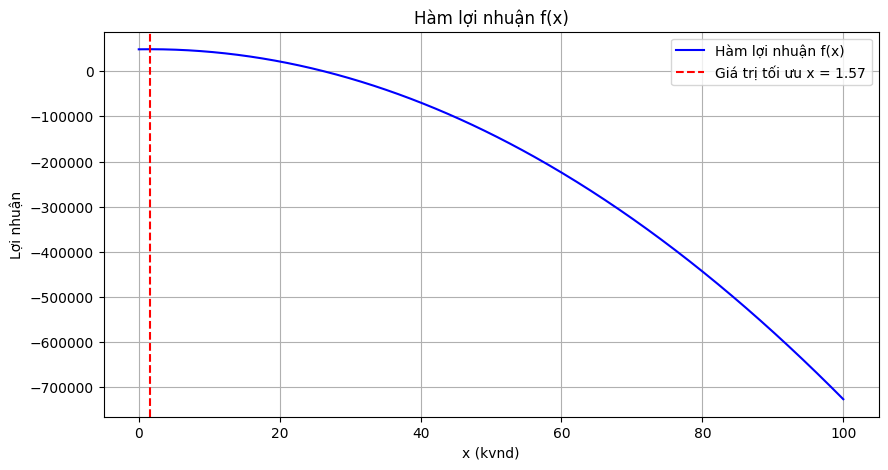

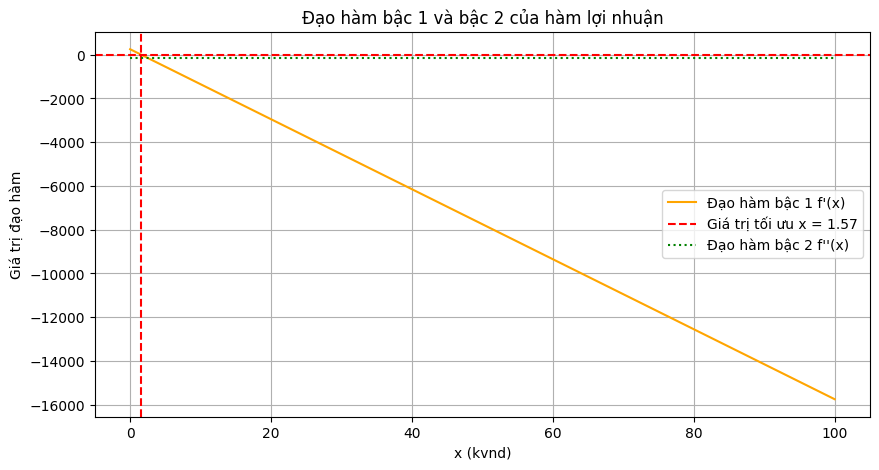

Mức tăng giá tối ưu 1.575 kVND
Giá mới 24.675 kVND


In [8]:
# Import các thư viện cần thiết
import numpy as np  # Thư viện tính toán khoa học cho Python
import matplotlib.pyplot as plt  # Thư viện vẽ đồ thị cho Python
import sympy as sp  # Thư viện tính toán ký hiệu cho Python

# Định nghĩa biến x dùng cho tính toán đạo hàm
x_sym = sp.Symbol('x')
initial_quantity = 2100 # số lít xăng bán ra trong ngày tại TP HCM
decrease_per_x = 80 # số lít xăng giảm đi mỗi lít tăng giá
initial_price = 23.1 # giá bán ban đầu tính theo k VND
# Định nghĩa hàm lợi nhuận theo x
profit_expr = (4800 - 80 * x_sym) * (50 + x_sym)
profit_expr = (initial_quantity - decrease_per_x * x_sym) * (initial_price + x_sym)

# Tính đạo hàm bậc 1 và bậc 2
profit_derivative_expr = sp.diff(profit_expr, x_sym)  # f'(x)
profit_second_derivative_expr = sp.diff(profit_derivative_expr, x_sym)  # f''(x)

# Tìm nghiệm của f'(x) = 0 để tìm giá trị tối ưu
optimal_x_sol = sp.solve(profit_derivative_expr, x_sym)

# Chọn nghiệm phù hợp
optimal_x = float(optimal_x_sol[0]) if optimal_x_sol else None

# Chuyển thành hàm để tính giá trị số
profit_func = sp.lambdify(x_sym, profit_expr, 'numpy')
profit_derivative_func = sp.lambdify(x_sym, profit_derivative_expr, 'numpy')
profit_second_derivative_func = sp.lambdify(x_sym, profit_second_derivative_expr, 'numpy')

# Tạo mảng giá trị x
x_values = np.linspace(0, 100, 400)

# Tính giá trị của hàm lợi nhuận và đạo hàm của nó
profit_values = np.array([profit_func(x) for x in x_values])
profit_derivative_values = np.array([profit_derivative_func(x) for x in x_values])
profit_second_derivative_values = np.array([profit_second_derivative_func(x) for x in x_values])

# Vẽ đồ thị hàm lợi nhuận
plt.figure(figsize=(10, 5))
plt.plot(x_values, profit_values, label='Hàm lợi nhuận f(x)', color='blue')
if optimal_x is not None:
    plt.axvline(optimal_x, color='r', linestyle='--', label=f'Giá trị tối ưu x = {optimal_x:.2f}')
plt.xlabel('x (kvnd)')
plt.ylabel('Lợi nhuận')
plt.title('Hàm lợi nhuận f(x)')
plt.legend()
plt.grid(True)
plt.show()

# Vẽ đồ thị đạo hàm bậc 1 và bậc 2
plt.figure(figsize=(10, 5))
plt.plot(x_values, profit_derivative_values, label="Đạo hàm bậc 1 f'(x)", color='orange')
plt.axhline(0, color='r', linestyle='--')  # Đường y = 0 để xác định nghiệm của f'(x)
if optimal_x is not None:
    plt.axvline(optimal_x, color='r', linestyle='--', label=f'Giá trị tối ưu x = {optimal_x:.2f}')
plt.plot(x_values, profit_second_derivative_values, label="Đạo hàm bậc 2 f''(x)", color='green', linestyle='dotted')
plt.xlabel('x (kvnd)')
plt.ylabel('Giá trị đạo hàm')
plt.title('Đạo hàm bậc 1 và bậc 2 của hàm lợi nhuận')
plt.legend()
plt.grid(True)
plt.show()

# In giá trị tối ưu
print("Mức tăng giá tối ưu", optimal_x, "kVND")
# Giá mới
print("Giá mới", initial_price + optimal_x, "kVND")